In [171]:
#Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [172]:
#Read the data

dataset = pd.read_csv('movies.csv')

### Checking the data

In [173]:
#Showing the first 5 rows

dataset.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [174]:
#Checking the number of rows/columns 

dataset.shape

(7668, 15)

In [175]:
#Showing an overview info about the data

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7663 non-null   object 
 1   rating    7586 non-null   object 
 2   genre     7663 non-null   object 
 3   year      7663 non-null   float64
 4   released  7661 non-null   object 
 5   score     7660 non-null   float64
 6   votes     7660 non-null   float64
 7   director  7663 non-null   object 
 8   writer    7660 non-null   object 
 9   star      7662 non-null   object 
 10  country   7660 non-null   object 
 11  budget    5496 non-null   float64
 12  gross     7475 non-null   float64
 13  company   7646 non-null   object 
 14  runtime   7659 non-null   float64
dtypes: float64(6), object(9)
memory usage: 898.7+ KB


In [176]:
#Looking for missing values

dataset.isnull().sum()

name           5
rating        82
genre          5
year           5
released       7
score          8
votes          8
director       5
writer         8
star           6
country        8
budget      2172
gross        193
company       22
runtime        9
dtype: int64

In [177]:
#Looking for duplicates

dataset.duplicated(keep=False).sum()

5

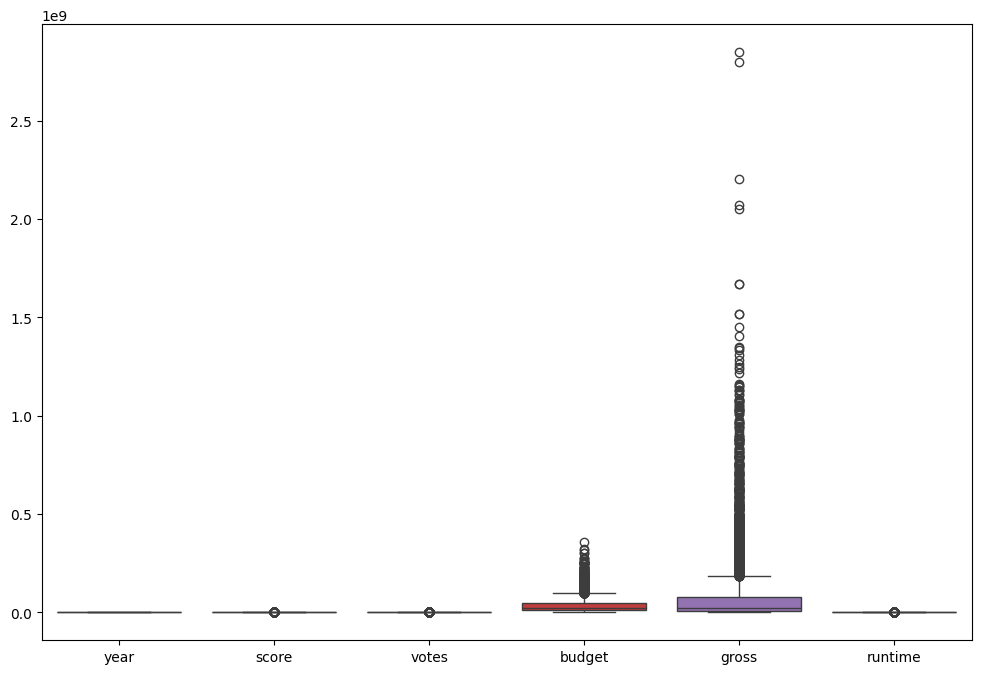

In [178]:
#Check for outliers

sns.boxplot(dataset)

plt.show()

### Data cleaning

In [179]:
#Fixing the "year" Column

dataset['new_year'] = dataset['released'].str.extract(r'(\d{4})')


In [180]:
dataset.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,new_year
0,The Shining,R,Drama,1980.0,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980.0,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980.0,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980.0,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [181]:
dataset.drop(columns=['year'], inplace=True)

In [182]:
dataset.rename(columns={'new_year' : 'Year'} , inplace= True)

In [183]:
# Delete the null values

dataset.dropna(inplace=True)

In [184]:
#Check again for null values

dataset.isnull().sum()

name        0
rating      0
genre       0
released    0
score       0
votes       0
director    0
writer      0
star        0
country     0
budget      0
gross       0
company     0
runtime     0
Year        0
dtype: int64

In [185]:
# Make sure to remove any duplicates

dataset.drop_duplicates()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,Bad Boys for Life,R,Action,"January 17, 2020 (United States)",6.6,140000.0,Adil El Arbi,Peter Craig,Will Smith,United States,90000000.0,426505244.0,Columbia Pictures,124.0,2020
7649,Sonic the Hedgehog,PG,Action,"February 14, 2020 (United States)",6.5,102000.0,Jeff Fowler,Pat Casey,Ben Schwartz,United States,85000000.0,319715683.0,Paramount Pictures,99.0,2020
7650,Dolittle,PG,Adventure,"January 17, 2020 (United States)",5.6,53000.0,Stephen Gaghan,Stephen Gaghan,Robert Downey Jr.,United States,175000000.0,245487753.0,Universal Pictures,101.0,2020
7651,The Call of the Wild,PG,Adventure,"February 21, 2020 (United States)",6.8,42000.0,Chris Sanders,Michael Green,Harrison Ford,Canada,135000000.0,111105497.0,20th Century Studios,100.0,2020


In [186]:
company_to_drop = 'Avi Arad Productions'

# Drop rows where the 'country' column matches the specified country
dataset = dataset[dataset['company'] != company_to_drop]

In [187]:
dataset.shape

(5419, 15)

### Finding relations in the data

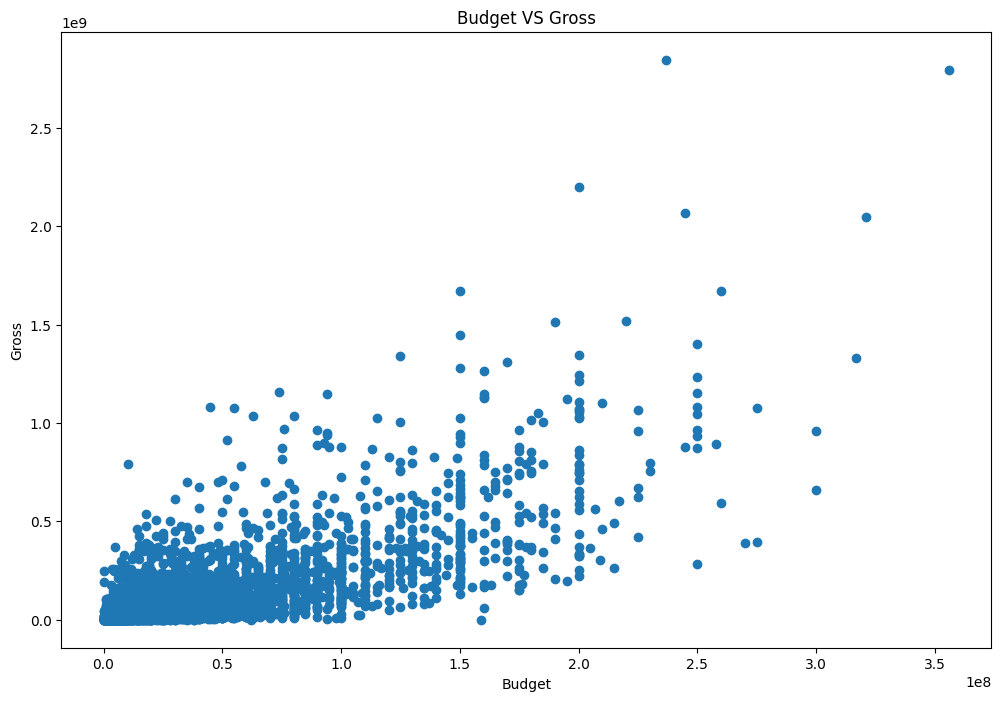

In [188]:
# Scatter Plot to find the relation between budget and gross


plt.scatter(x = dataset['budget'] , y=dataset['gross'])
plt.title('Budget VS Gross')
plt.xlabel('Budget')
plt.ylabel('Gross')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

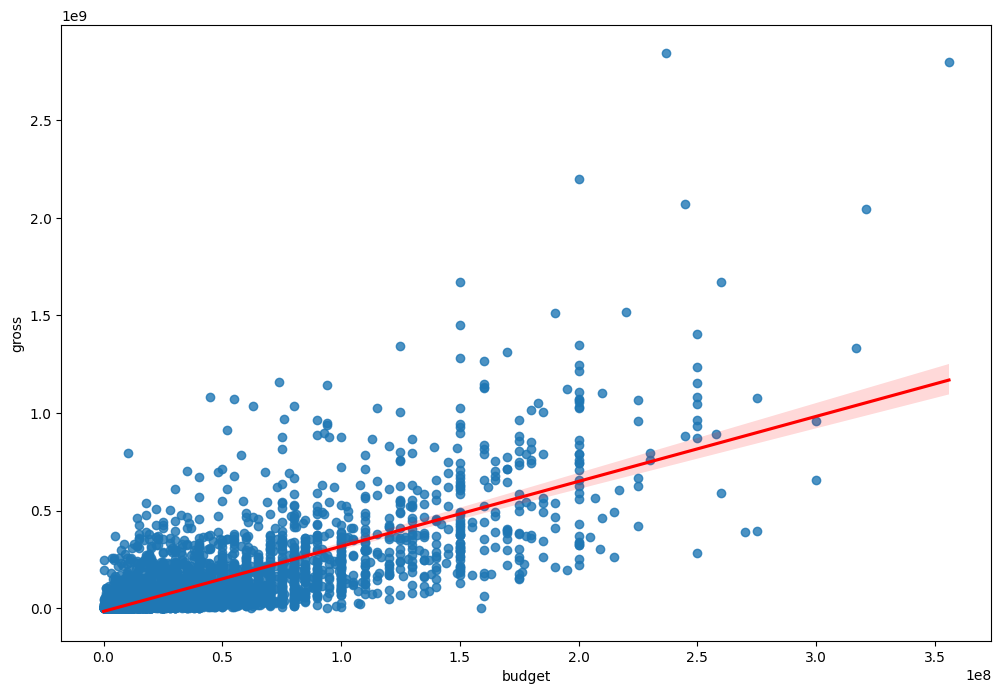

In [189]:
# Plot a regplot to demonstrate the relation

sns.regplot( x = 'budget' , y = 'gross', data = dataset , line_kws={"color" : "red"})

In [190]:
#Looking at correlations

# Select only numeric columns
numeric_columns = dataset.select_dtypes(include=['number'])

numeric_columns.corr()


,score,votes,budget,gross,runtime
score,1.000000,0.474494,0.072205,0.222867,0.414515
votes,0.474494,1.000000,0.439424,0.614688,0.352294
budget,0.072205,0.439424,1.000000,0.740359,0.318602
gross,0.222867,0.614688,0.740359,1.000000,0.275992
runtime,0.414515,0.352294,0.318602,0.275992,1.000000


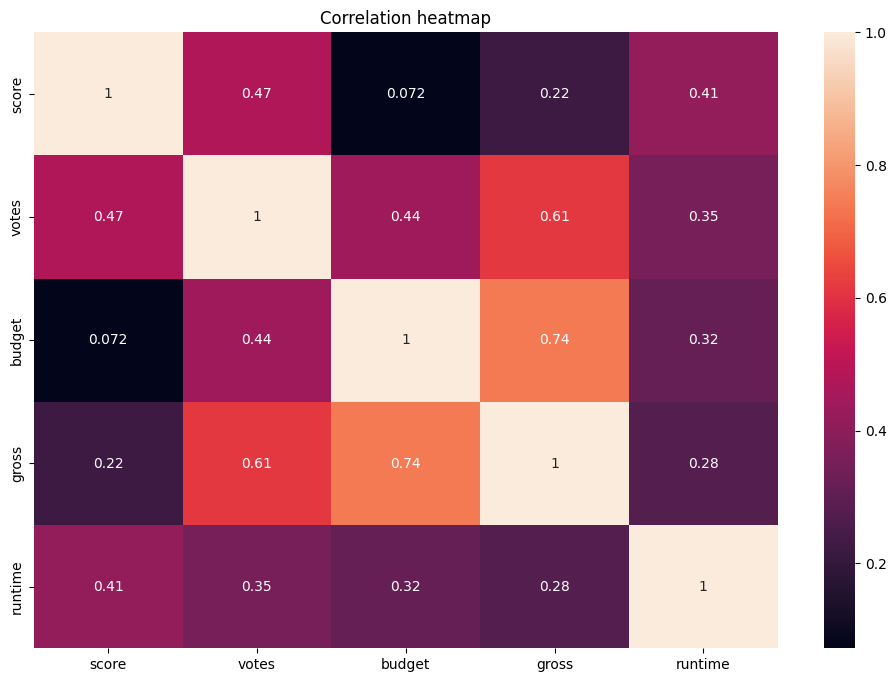

In [191]:
#Plot a heatmap

correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation heatmap')

plt.show()


#### Find the correlation between company and gross

In [192]:
dataset_numm = dataset.copy()

In [193]:
dataset_numerized = dataset_numm

for col_name in dataset_numerized.columns:
    if(dataset_numerized[col_name].dtype == 'object'):
        dataset_numerized[col_name] = dataset_numerized[col_name].astype('category')
        dataset_numerized[col_name] = dataset_numerized[col_name].cat.codes

dataset_numerized

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,4692,6,6,1303,8.4,927000.0,1794,2830,698,45,19000000.0,46998772.0,1424,146.0,0
1,3929,6,1,1127,5.8,65000.0,1577,1157,213,46,4500000.0,58853106.0,450,104.0,0
2,3641,4,0,1358,8.7,1200000.0,756,1816,1156,46,18000000.0,538375067.0,943,124.0,0
3,204,4,4,1127,7.7,221000.0,888,1411,1473,46,3500000.0,83453539.0,1106,88.0,0
4,732,6,4,1170,7.3,108000.0,718,350,270,46,6000000.0,39846344.0,1081,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,904,6.6,140000.0,16,2388,1811,46,90000000.0,426505244.0,450,124.0,40
7649,3556,4,0,713,6.5,102000.0,851,2307,146,46,85000000.0,319715683.0,1106,99.0,40
7650,1153,4,1,904,5.6,53000.0,1808,2825,1469,46,175000000.0,245487753.0,1395,101.0,40
7651,3978,4,1,758,6.8,42000.0,293,2089,639,6,135000000.0,111105497.0,12,100.0,40


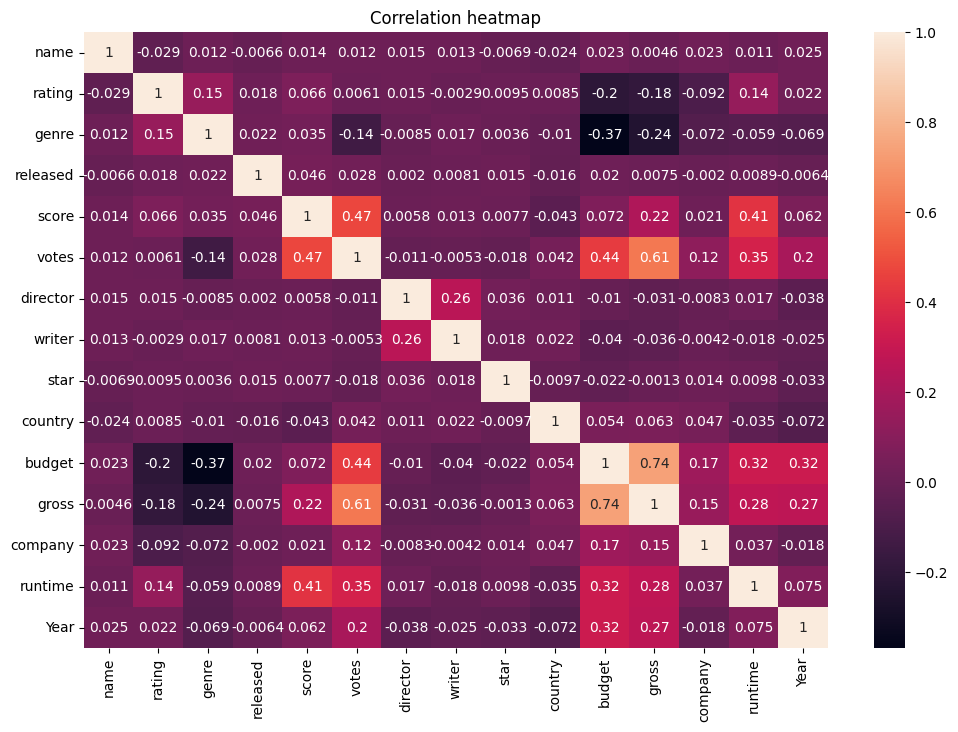

In [194]:
correlation_matrix = dataset_numerized.corr()

sns.heatmap(correlation_matrix , annot = True)

plt.title('Correlation heatmap')

plt.show()

#### Filter the correlation 

In [195]:
dataset_numerized.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
name,1.000000,-0.029420,0.011519,-0.006566,0.013875,0.012292,0.015399,0.013431,-0.006881,-0.024004,0.023204,0.004626,0.022645,0.011092,0.024935
rating,-0.029420,1.000000,0.147852,0.018159,0.065778,0.006137,0.014939,-0.002929,0.009474,0.008503,-0.203836,-0.181962,-0.092279,0.140966,0.022005
genre,0.011519,0.147852,1.000000,0.022482,0.035351,-0.135727,-0.008455,0.017392,0.003571,-0.010400,-0.368407,-0.243618,-0.071910,-0.059296,-0.068763
released,-0.006566,0.018159,0.022482,1.000000,0.045814,0.028464,0.002034,0.008144,0.015323,-0.016404,0.019547,0.007467,-0.001982,0.008935,-0.006381
score,0.013875,0.065778,0.035351,0.045814,1.000000,0.474494,0.005843,0.013345,0.007680,-0.042745,0.072205,0.222867,0.021212,0.414515,0.061684
votes,0.012292,0.006137,-0.135727,0.028464,0.474494,1.000000,-0.010764,-0.005329,-0.018160,0.042241,0.439424,0.614688,0.118917,0.352294,0.202808
director,0.015399,0.014939,-0.008455,0.002034,0.005843,-0.010764,1.000000,0.261483,0.035875,0.011444,-0.010208,-0.030549,-0.008329,0.017123,-0.037523
writer,0.013431,-0.002929,0.017392,0.008144,0.013345,-0.005329,0.261483,1.000000,0.018178,0.021881,-0.039651,-0.035883,-0.004212,-0.017830,-0.025262
star,-0.006881,0.009474,0.003571,0.015323,0.007680,-0.018160,0.035875,0.018178,1.000000,-0.009749,-0.022152,-0.001272,0.014149,0.009773,-0.032955
country,-0.024004,0.008503,-0.010400,-0.016404,-0.042745,0.042241,0.011444,0.021881,-0.009749,1.000000,0.054010,0.062532,0.047102,-0.035066,-0.072236


In [196]:
correlation_mat = dataset_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name  name        1.000000
      rating     -0.029420
      genre       0.011519
      released   -0.006566
      score       0.013875
                    ...   
Year  budget      0.320136
      gross       0.268108
      company    -0.018137
      runtime     0.075368
      Year        1.000000
Length: 225, dtype: float64

In [197]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget    genre      -0.368407
genre     budget     -0.368407
          gross      -0.243618
gross     genre      -0.243618
rating    budget     -0.203836
                        ...   
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
Length: 225, dtype: float64

In [198]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

votes     gross       0.614688
gross     votes       0.614688
budget    gross       0.740359
gross     budget      0.740359
name      name        1.000000
writer    writer      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
rating    rating      1.000000
runtime   runtime     1.000000
Year      Year        1.000000
dtype: float64

### Data Analysis


#### Question 1 : What are the countries that makes the most movies?

In [199]:
dataset.value_counts('country').head(10)

country
United States     4319
United Kingdom     492
Canada             111
France             105
Germany             82
Australia           42
Japan               28
China               25
Hong Kong           24
Ireland             21
Name: count, dtype: int64

#### Question 2: What is the distribution of movie genres in the dataset? Which genre is the most common?

In [200]:
dataset.value_counts('genre')

genre
Comedy       1496
Action       1414
Drama         863
Crime         399
Adventure     327
Biography     311
Animation     276
Horror        251
Fantasy        41
Mystery        17
Thriller        7
Sci-Fi          6
Romance         5
Family          4
Western         2
Name: count, dtype: int64

#### Question 3: How has the movie budget changed over the years? Are there any trends or patterns?

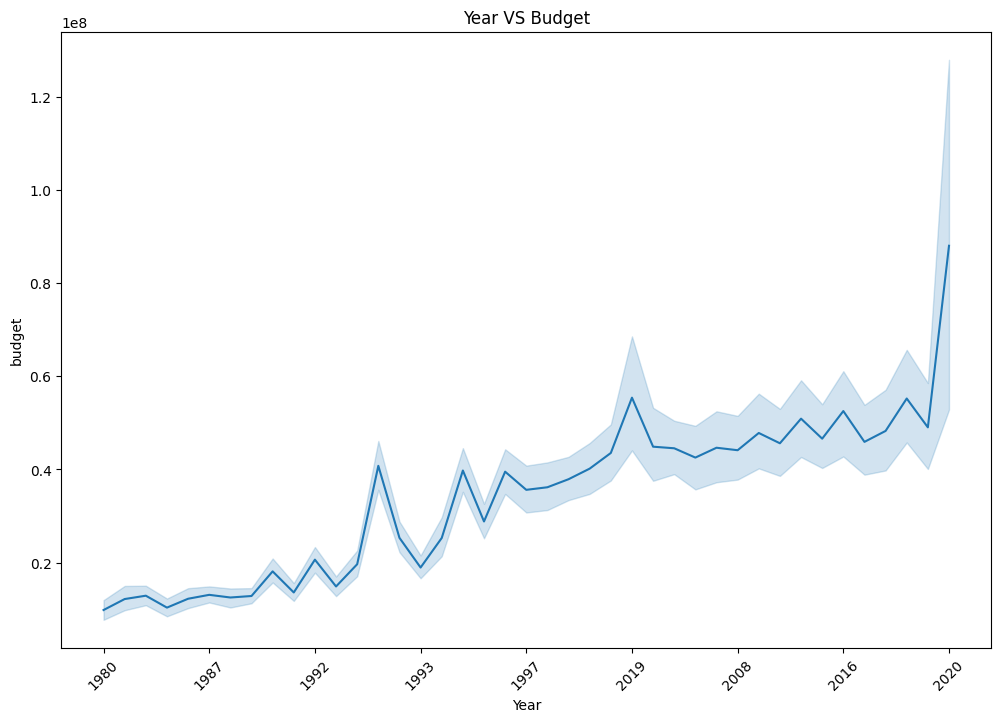

In [201]:
sns.lineplot(x='Year', y='budget', data=dataset)


plt.title('Year VS Budget')


tick_positions = dataset['Year'].unique()[::5]
tick_labels = [str(year) for year in tick_positions]  
plt.xticks(tick_positions, tick_labels, rotation=45)


plt.show()

#### Question 4: Who are the top directors in terms of average gross revenue per movie? Are there any directors consistently associated with high-grossing movies?

In [202]:
Average_gross_by_director = dataset.groupby('director')['gross'].mean().reset_index()


top_directors = Average_gross_by_director.sort_values(by='gross', ascending=False).head(10)

top_directors

,director,gross
105,Anthony Russo,1.368850e+09
1143,Kyle Balda,1.097122e+09
1051,Josh Cooley,1.073395e+09
276,Chris Buck,1.059909e+09
1059,Joss Whedon,9.873567e+08
1161,Lee Unkrich,9.373943e+08
784,James Cameron,8.925841e+08
652,George Lucas,8.497511e+08
451,David Yates,8.407581e+08
767,J.J. Abrams,7.765626e+08


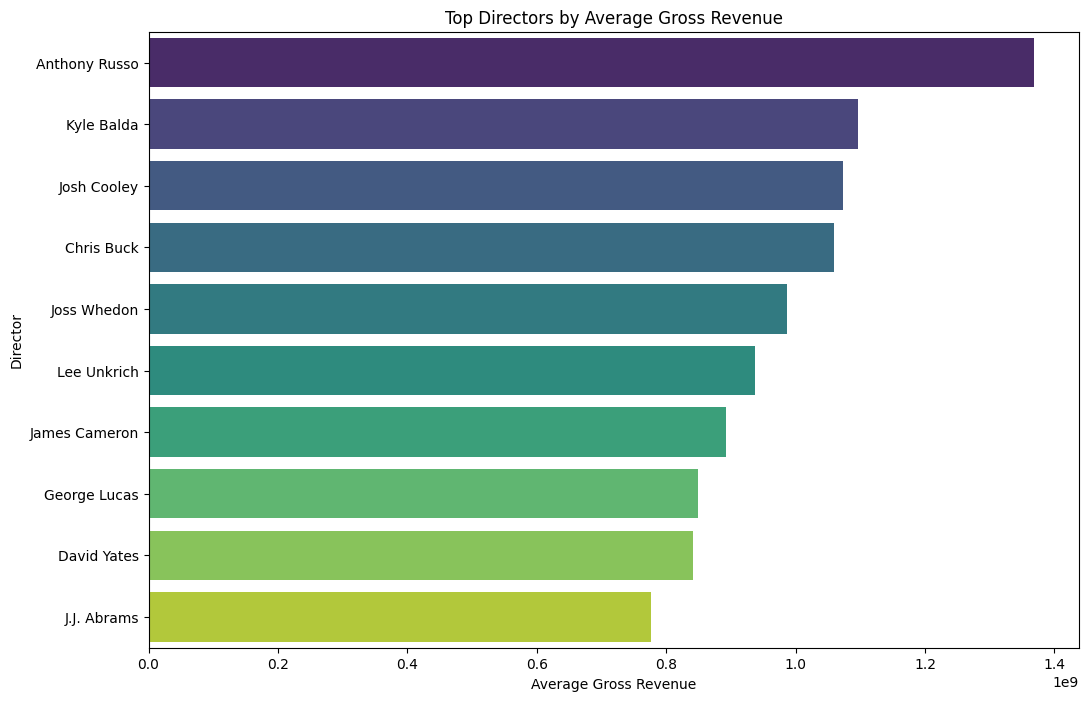

In [203]:
sns.barplot(x='gross', y='director', data=top_directors, hue='director', dodge=False, palette='viridis', legend=False)


plt.title('Top Directors by Average Gross Revenue')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Director')


plt.show()

#### Question 5: Is there a relationship between the movie rating (e.g., PG-13, R) and its gross revenue? Do certain ratings tend to perform better at the box office?

In [204]:
Rating_Group = dataset.groupby('rating')['gross'].mean().reset_index()

In [205]:
Sorted_rating = Rating_Group.sort_values(by='gross' , ascending=False)

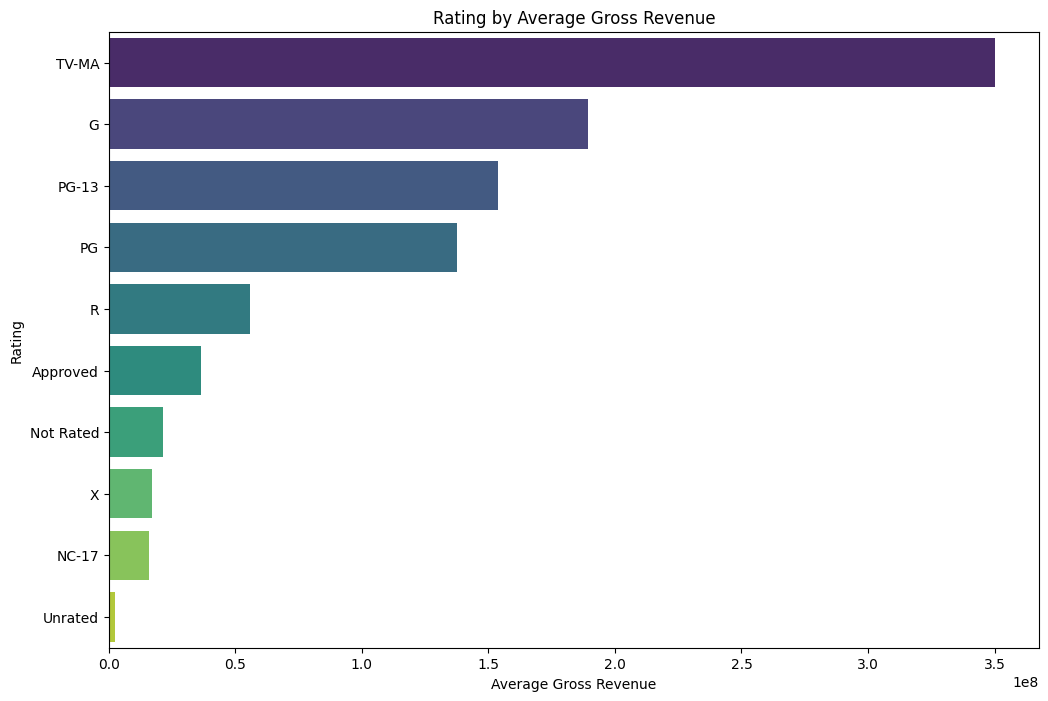

In [206]:
sns.barplot(x='gross', y='rating', data=Sorted_rating, hue='rating', dodge=False, palette='viridis', legend=False)

plt.title('Rating by Average Gross Revenue')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Rating')


plt.show()

#### Question 6: How does the runtime of a movie affect its gross revenue? Are longer movies more successful, or is there an optimal runtime for maximizing revenue?

In [207]:
# Convert the runtime into bins 

bins = [0, 90, 120, float('inf')]  

labels = ['Short', 'Medium', 'Long']  

dataset['runtime_category'] = pd.cut(dataset['runtime'], bins=bins, labels=labels, right=False)


dataset[['runtime', 'runtime_category']].head()


,runtime,runtime_category
0,146.0,Long
1,104.0,Medium
2,124.0,Long
3,88.0,Short
4,98.0,Medium


In [208]:
runtime_group = dataset.groupby('runtime_category')['gross'].mean().reset_index()

C:\Users\Ahmad_AZ\AppData\Local\Temp\ipykernel_13656\1034945504.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  runtime_group = dataset.groupby('runtime_category')['gross'].mean().reset_index()


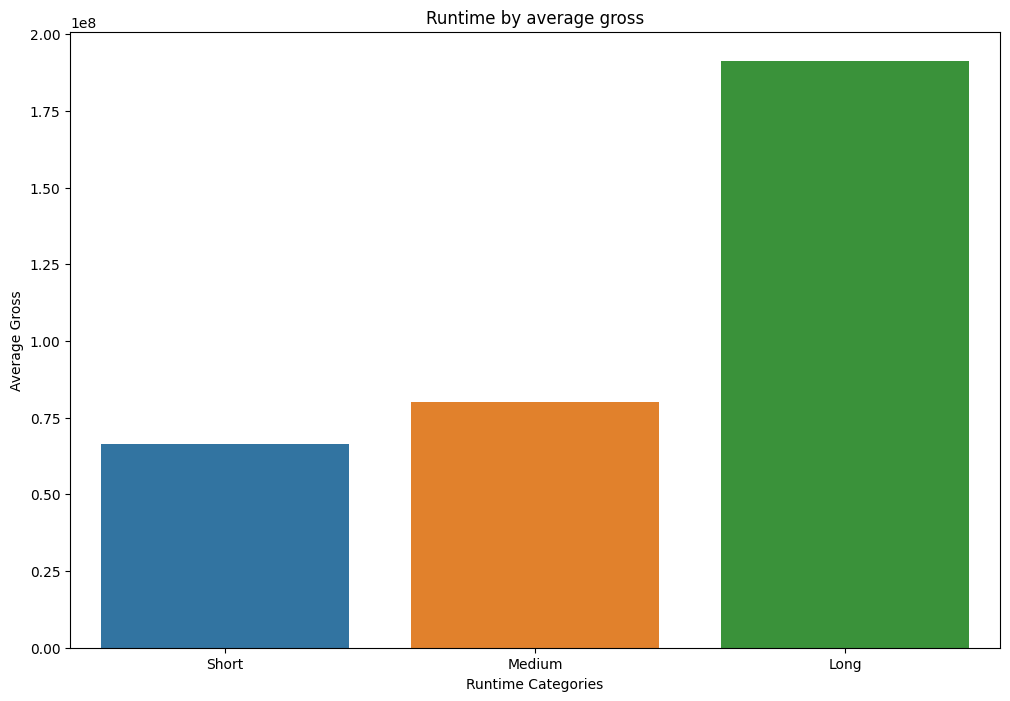

In [209]:
sns.barplot(x='runtime_category' , y = 'gross' , data=runtime_group , hue='runtime_category' , legend=False)

plt.title('Runtime by average gross')
plt.xlabel('Runtime Categories')
plt.ylabel('Average Gross')


plt.show()

#### Question 7: Which production companies have produced the most movies? Are there any companies associated with a higher average gross revenue per movie?

In [210]:
#top 10 companies in producing movies

dataset['company'].value_counts(ascending=False).head(10)

company
Universal Pictures           330
Columbia Pictures            302
Warner Bros.                 298
Paramount Pictures           279
Twentieth Century Fox        209
New Line Cinema              155
Walt Disney Pictures         107
Touchstone Pictures          105
Metro-Goldwyn-Mayer (MGM)     99
Dreamworks Pictures           75
Name: count, dtype: int64

In [211]:
company_group = dataset.groupby('company')['gross'].mean().reset_index()

top_companies = company_group.sort_values(by='gross' , ascending=False).head(10)

In [212]:
top_companies

,company,gross
981,Marvel Studios,1.255466e+09
818,Illumination Entertainment,1.097122e+09
626,Fairview Entertainment,9.665549e+08
189,B24,8.806815e+08
404,Chris Morgan Productions,7.590569e+08
868,Jolie Pas,7.584118e+08
943,Lucasfilm,7.185352e+08
980,Marvel Entertainment,7.144215e+08
226,Beijing Dengfeng International Culture Communi...,6.999925e+08
1132,Pixar Animation Studios,6.571954e+08


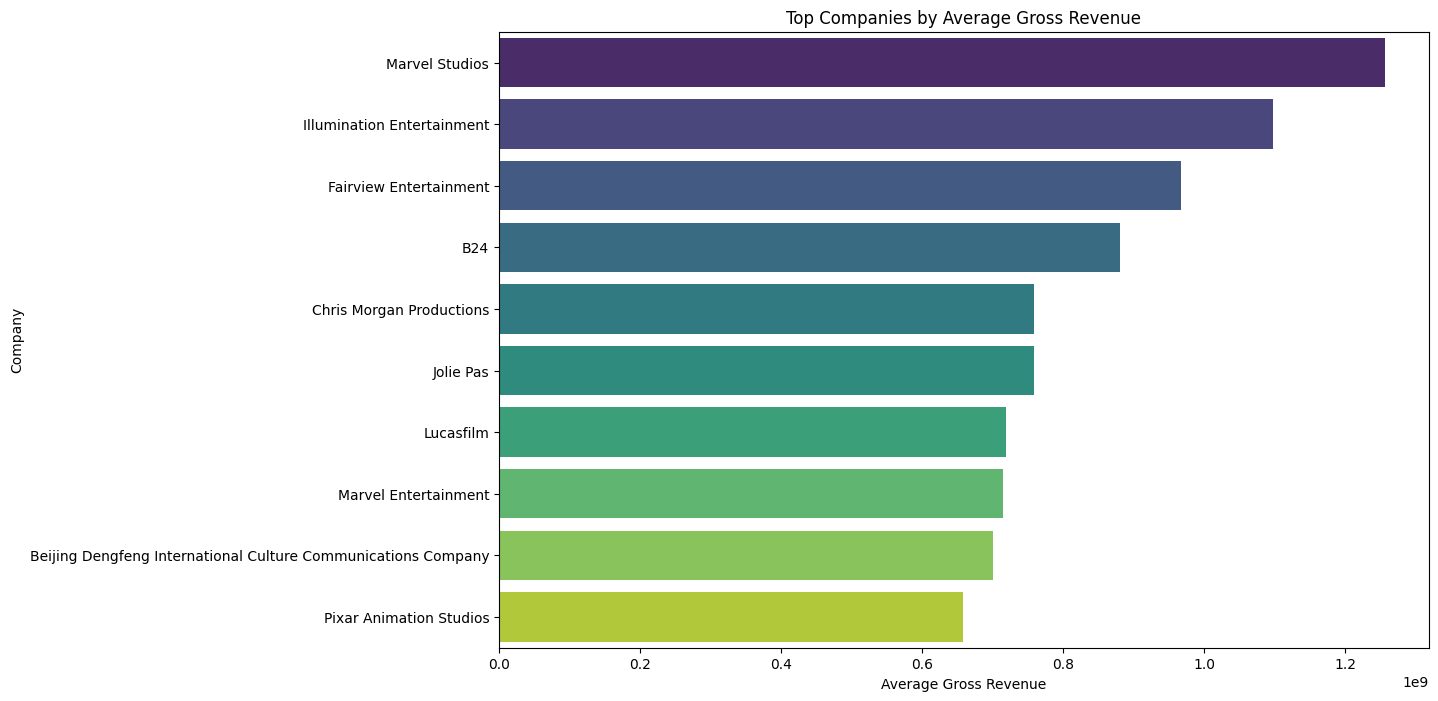

In [213]:
sns.barplot(x='gross', y='company', data=top_companies, hue='company', dodge=False, palette='viridis', legend=False)


plt.title('Top Companies by Average Gross Revenue')
plt.xlabel('Average Gross Revenue')
plt.ylabel('Company')


plt.show()

In [217]:
dataset.loc[dataset['company'] == 'Illumination Entertainment']

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year,runtime_category
6688,Minions,PG,Animation,"July 10, 2015 (United States)",6.4,218000.0,Kyle Balda,Brian Lynch,Sandra Bullock,United States,74000000.0,1.159445e+09,Illumination Entertainment,91.0,2015,Medium
7140,Despicable Me 3,PG,Animation,"June 30, 2017 (United States)",6.3,119000.0,Kyle Balda,Cinco Paul,Steve Carell,United States,80000000.0,1.034800e+09,Illumination Entertainment,89.0,2017,Short
